In [22]:
import seaborn as sns
import pandas as pd
import numpy as np
import itertools

from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from matplotlib import pyplot as plt


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.layers import Activation, Dense, LeakyReLU # Type of layers


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix





In [23]:
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import NearMiss
from collections import Counter


In [24]:
url = "https://raw.githubusercontent.com/becodeorg/GNT-Arai-2.31/master/content/additional_resources/datasets/Wine%20Quality/wine.csv?token=AUDYSCOBCKJXVFIIH6ZCD4TBIBH2E"
df = pd.read_csv(url)
df = df.drop_duplicates()
df = df.iloc[: , 1:]

num_list = [0,1,2,3,4,5,6,7,8,9,10]
for number in num_list:
    if number < 5:
        df['quality'] = df['quality'].replace([number],0)
    else:
        df['quality'] = df['quality'].replace([number],1)
  
print(df['quality'].value_counts())


X = df.drop(['quality'],axis=1).values
y = df['quality'].values

# df.head()
df.info()
# df.shape



1    6251
0     246
Name: quality, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 659.9 KB


In [221]:
# (df-df.min())/(df.max()-df.min())
# (df-df.mean())/df.std()

In [79]:

# nm = NearMiss()
# X_res,y_res=nm.fit_resample(X,y)

# print('Original dataset shape {}'.format(Counter(y)))
# print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 5220, 1: 1277})
Resampled dataset shape Counter({0: 1277, 1: 1277})


In [63]:
# from imblearn.over_sampling import RandomOverSampler

# os =  RandomOverSampler()
# X_train_res, y_train_res = os.fit_resample(X, y)

# print('Original dataset shape {}'.format(Counter(y)))
# print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 1277, 1: 1277})
Resampled dataset shape Counter({0: 1277, 1: 1277})


In [207]:
# from imblearn.combine import SMOTETomek


# smk = SMOTETomek()
# X_res,y_res=smk.fit_resample(X,y)

# print('Original dataset shape {}'.format(Counter(y)))
# print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 5220, 1: 1277})
Resampled dataset shape Counter({0: 5158, 1: 5158})


In [222]:
# X, y = X_res, y_res 


In [25]:

for number in y:
    if number == 1:
        one += 1
    else:
        zero += 1
print(one,"\n",zero) 

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2, shuffle=True)

# scaler_x = MinMaxScaler().fit(X_train)
# X_train = scaler_x.transform(X_train)
# X_test = scaler_x.transform(X_test)

# scaler_y = MinMaxScaler().fit(y_train.reshape(-1,1))
# y_train = scaler_y.transform(y_train.reshape(-1,1))
# y_test = scaler_y.transform(y_test.reshape(-1,1))



print(X_train.shape,"\n",X_test.shape,"\n", y_train.shape,"\n", y_test.shape)



11251 
 443
(5197, 11) 
 (1300, 11) 
 (5197,) 
 (1300,)


In [250]:
# num_val_samples = int(len(X) * 0.2)
# train_features = X[:-num_val_samples]
# train_targets = y[:-num_val_samples]
# val_features = X[-num_val_samples:]
# val_targets = y[-num_val_samples:]


# print("Number of training samples:", len(train_features))
# print("Number of validation samples:", len(val_features))

In [26]:
one = 0
zero = 0
for number in y_train:
    if number == 1:
        one += 1
    else:
        zero += 1
print(one,"\n",zero)        

5000 
 197


In [8]:
# counts = np.bincount(train_targets[:, 0])
print(
    "Number of positive samples in training data: {} ({:.2f}% of total)".format(
        zero, 100 * float(zero) / len(y_train)
    )
)

weight_for_0 = 1.0 / zero
weight_for_1 = 1.0 / one

Number of positive samples in training data: 197 (3.79% of total)


In [226]:
# mean = np.mean(train_features, axis=0)
# train_features -= mean
# val_features -= mean
# std = np.std(train_features, axis=0)
# train_features /= std
# val_features /= std

In [27]:

model = keras.Sequential(
    [
        keras.layers.Dense(
            11, activation="relu", input_shape=(y_train.shape[-1],)
        ),
        keras.layers.Dense(20, activation="relu"),
        
#         keras.layers.Dense(20, activation="relu"),
        
        keras.layers.Dense(1, activation="sigmoid"),
    ]
)
model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 11)                57178     
_________________________________________________________________
dense_10 (Dense)             (None, 20)                240       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 21        
Total params: 57,439
Trainable params: 57,439
Non-trainable params: 0
_________________________________________________________________


In [28]:

model.compile(
    optimizer=keras.optimizers.Adam(1e-2), loss="binary_crossentropy", metrics=['accuracy']
)

callbacks = [keras.callbacks.ModelCheckpoint("version")]
class_weight = {0: weight_for_0, 1: weight_for_1}

quality = model.fit(
    X_train,
    y_train,
    batch_size=300,
    epochs=100,
    verbose=2,
    callbacks=callbacks,
    validation_data=(X_test, y_test)
#     ,class_weight=class_weight,
)


Epoch 1/100


ValueError: in user code:

    /home/mementomori/anaconda3/envs/tf/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:806 train_function  *
        return step_function(self, iterator)
    /home/mementomori/anaconda3/envs/tf/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /home/mementomori/anaconda3/envs/tf/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/mementomori/anaconda3/envs/tf/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /home/mementomori/anaconda3/envs/tf/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    /home/mementomori/anaconda3/envs/tf/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:789 run_step  **
        outputs = model.train_step(data)
    /home/mementomori/anaconda3/envs/tf/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:747 train_step
        y_pred = self(x, training=True)
    /home/mementomori/anaconda3/envs/tf/lib/python3.7/site-packages/tensorflow/python/keras/engine/base_layer.py:976 __call__
        self.name)
    /home/mementomori/anaconda3/envs/tf/lib/python3.7/site-packages/tensorflow/python/keras/engine/input_spec.py:216 assert_input_compatibility
        ' but received input with shape ' + str(shape))

    ValueError: Input 0 of layer sequential_3 is incompatible with the layer: expected axis -1 of input shape to have value 5197 but received input with shape [None, 11]


In [14]:
predictions = model.predict(X_test)

results = model.evaluate(X_test, y_test)
print(f"\nAccuracy on test set is {results[1]*100:.2f}%")

ValueError: in user code:

    /home/mementomori/anaconda3/envs/tf/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1462 predict_function  *
        return step_function(self, iterator)
    /home/mementomori/anaconda3/envs/tf/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1452 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /home/mementomori/anaconda3/envs/tf/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/mementomori/anaconda3/envs/tf/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /home/mementomori/anaconda3/envs/tf/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    /home/mementomori/anaconda3/envs/tf/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1445 run_step  **
        outputs = model.predict_step(data)
    /home/mementomori/anaconda3/envs/tf/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1418 predict_step
        return self(x, training=False)
    /home/mementomori/anaconda3/envs/tf/lib/python3.7/site-packages/tensorflow/python/keras/engine/base_layer.py:976 __call__
        self.name)
    /home/mementomori/anaconda3/envs/tf/lib/python3.7/site-packages/tensorflow/python/keras/engine/input_spec.py:216 assert_input_compatibility
        ' but received input with shape ' + str(shape))

    ValueError: Input 0 of layer sequential_1 is incompatible with the layer: expected axis -1 of input shape to have value 1 but received input with shape [None, 11]


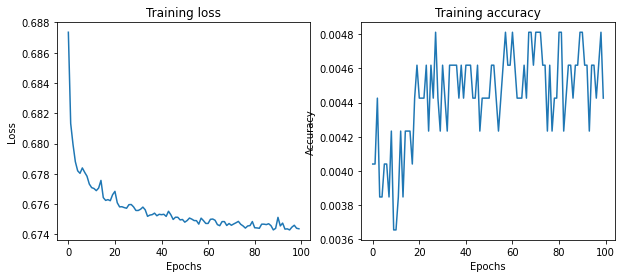

In [243]:
def plot_loss_accuracy(quality):
    loss = quality.history['loss']
    accuracy = quality.history['accuracy']
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
    axs[0].plot(range(len(loss)), loss)
    axs[0].set(xlabel="Epochs", ylabel="Loss", title="Training loss")
    axs[1].plot(range(len(accuracy)), accuracy)
    axs[1].set(xlabel="Epochs", ylabel="Accuracy", title="Training accuracy")
    plt.show()
plot_loss_accuracy(quality)
# plot.savefig('visuals/loss_accuracy.png')

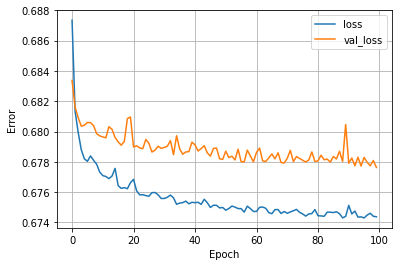

In [244]:
def plot_loss(quality):
  plt.plot(quality.history['loss'], label='loss')
  plt.plot(quality.history['val_loss'], label='val_loss')
#   plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)
plot_loss(quality)
# plot.savefig('visuals/plot_loss.png')

In [29]:
predictions = model.predict(x=X_test, batch_size=100)
rounded_predictions = np.argmax(predictions, axis=-1)
cm = confusion_matrix(y_test,rounded_predictions)

plot_labels = ["bad","good"]

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.coolwarm)
plt.title("Confusion matrix")
plt.colorbar()
tick_marks = np.arange(len(plot_labels))
plt.xticks(tick_marks, plot_labels, rotation=45)
plt.yticks(tick_marks, plot_labels)

thresh = y_test.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j],
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
# plt.savefig('visuals/cm.png')

ValueError: in user code:

    /home/mementomori/anaconda3/envs/tf/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1462 predict_function  *
        return step_function(self, iterator)
    /home/mementomori/anaconda3/envs/tf/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1452 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /home/mementomori/anaconda3/envs/tf/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/mementomori/anaconda3/envs/tf/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /home/mementomori/anaconda3/envs/tf/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    /home/mementomori/anaconda3/envs/tf/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1445 run_step  **
        outputs = model.predict_step(data)
    /home/mementomori/anaconda3/envs/tf/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1418 predict_step
        return self(x, training=False)
    /home/mementomori/anaconda3/envs/tf/lib/python3.7/site-packages/tensorflow/python/keras/engine/base_layer.py:976 __call__
        self.name)
    /home/mementomori/anaconda3/envs/tf/lib/python3.7/site-packages/tensorflow/python/keras/engine/input_spec.py:216 assert_input_compatibility
        ' but received input with shape ' + str(shape))

    ValueError: Input 0 of layer sequential_3 is incompatible with the layer: expected axis -1 of input shape to have value 5197 but received input with shape [100, 11]
